In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
#from pdffuns import *
import pickle

## Lab 4
Daniel Fylling

This is not a finished product and I'm well aware of that. 
The reason for not finishing is that I've been completely tied up with some other commitments for the past 2 weeks.

In problem 1 I got the functions up and running, but it seems my results are sytematically a little off from the tables given in the assignment.
Maybe you can help me identify what I've done wrong?
As I've been tied up, I have not had the oportunity to come to labs for help.

Did not finish Problem 2 yet, but I will comtinue working on that. This is really fun and interesting to work with.

I would like to integrate more of the functions together and export the functions to a separate python file.
Maybe wrapping everything into a class could be beneficial.

Not much text or reflections through this work.. Sorry for the mess.
All functions are now inside this ipynb, and since they are not merged together I think the code and my thinking should not be too difficult to understand.

If the below is not enough to pass the assessment, i will get back to this next week.

### Problem 1


a) 

In [35]:
pfile='lab4.p'
with open(pfile, "rb") as fp:
     X, Y =pickle.load(fp)

print(Y[0].shape)
print(Y[1].shape)

print(X[0].shape)
print(X[1].shape)

(2, 120)
(2, 80)
(2, 120)
(2, 80)


In [36]:
def norm2d_XY(my, Sgm, X):
    l=2
    n = len(X[0,:])
    p = np.zeros(n)
    for i in np.arange(0, n):
        x = X[:,i]
        p[i] = (2 * np.pi)**(-l/2) * np.power(np.linalg.det(Sgm),-1/2) * np.exp(-1 / 2 * np.linalg.multi_dot([ x - my , np.linalg.inv(Sgm) , (x - my).reshape(-1,1)]))
            
    return p

c)

In [37]:
def Classify(X, Y):
    #Classify test data X based on training data Y
    myY = []
    SgmY = []

    for i in range(len(Y)):
        myY.append(np.mean(Y[i] ,1))
        SgmY.append(np.cov(Y[i]))

    PY = []
    
    for i in range(len(myY)):
        for j in range(len(X)):

            p = norm2d_XY(myY[i], SgmY[i], X[j])
            PY.append(p)

    a = PY[0] # probability of w1 values in X being w1
    b = PY[1] # probability of w2 values in X being w1
    c = PY[2] # probability of w1 values in X being w2
    d = PY[3] # probability of w2 values in X being w2
    mask1 = c>a
    mask2 = b>d

    C = [mask1, mask2]
    G = PY
    return G, C



In [38]:
def Result(C):
    print(f'P(error) =      {(sum(C[0])+sum(C[1]))/(len(C[0])+len(C[1])):.2f}')
    print(f'P(correct|w1) = {1-(sum(C[0])/len(C[0])):.2f}')
    print(f'P(correct|w2) = {1-(sum(C[1])/len(C[1])):.2f}')


In [39]:
G, C = Classify(Y, Y)
Result(C)

P(error) =      0.08
P(correct|w1) = 0.92
P(correct|w2) = 0.93


In [40]:
G, C = Classify(X, Y)
Result(C)

P(error) =      0.04
P(correct|w1) = 0.95
P(correct|w2) = 0.96


d)


In [41]:
def parzen_XY(X, Y, h1):
    P = [] 

    n = len(X[0,:])
    g = np.zeros(n)
    N = Y.shape[1]
    hn = h1 * np.power(N,-0.5)
    SgmY = hn**2 * np.identity(2)

    for k in range(N):
        myY = np.array([Y[0][k], Y[1][k]])
        p = norm2d_XY(myY, SgmY, X)
        g = g + p/N
    P.append(g)
    return P

In [42]:
def Classify_parzen(X, Y, h1):
    #Classify test data X based on training data Y
    PY = []
    
    for i in range(len(Y)):
        for j in range(len(X)):

            p = parzen_XY(X[j], Y[i], h1)
            PY.append(p)

    a = PY[0][0] # probability of w1 values in X being w1
    b = PY[1][0] # probability of w2 values in X being w1
    c = PY[2][0] # probability of w1 values in X being w2
    d = PY[3][0] # probability of w2 values in X being w2
    mask1 = c>a
    mask2 = b>d

    C = [mask1, mask2]
    G = PY
    return G, C


In [43]:
h1 = 0.1 
G, C = Classify_parzen(Y, Y, h1)
Result(C)

P(error) =      0.00
P(correct|w1) = 1.00
P(correct|w2) = 1.00


In [44]:

h1 = 0.1 
G, C = Classify_parzen(X, Y, h1)
Result(C)

P(error) =      0.10
P(correct|w1) = 0.91
P(correct|w2) = 0.90


In [45]:
h1 = 5
G, C = Classify_parzen(Y, Y, h1)
Result(C)

P(error) =      0.09
P(correct|w1) = 0.91
P(correct|w2) = 0.91


In [46]:
h1 = 5
G, C = Classify_parzen(X, Y, h1)
Result(C)

P(error) =      0.07
P(correct|w1) = 0.91
P(correct|w2) = 0.95


In [47]:
# X --> Y
# x --> X 

def knn2D_XY(X, Y, kn):
    n = len(X[0,:])
    N = Y.shape[1]
    p = np.zeros(n)

    for i in np.arange(0, n):
        x = X[:,i]
        x = np.tile(x,(N, 1)).T
        R = np.sqrt(np.sum(np.square(Y-x),0))
        V = np.sort(R)[kn-1]
        p[i] = kn / N / V            
    return p

In [48]:
def Classify_knn(X, Y, kn):
    #Classify test data X based on training data Y
    PY = []
    
    for i in range(len(Y)):
        for j in range(len(X)):

            p = knn2D_XY(X[j], Y[i], kn)
            PY.append(p)

    a = PY[0] # probability of w1 values in X being w1
    b = PY[1] # probability of w2 values in X being w1
    c = PY[2] # probability of w1 values in X being w2
    d = PY[3] # probability of w2 values in X being w2
    mask1 = c>a
    mask2 = b>d

    C = [mask1, mask2]
    G = PY
    return G, C

In [49]:
kn = 1
G, C = Classify_knn(Y, Y, kn)
Result(C)

P(error) =      0.00
P(correct|w1) = 1.00
P(correct|w2) = 1.00


C:\Users\danfy\AppData\Local\Temp\ipykernel_14648\2822242231.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  p[i] = kn / N / V


In [50]:
kn = 1
G, C = Classify_knn(X, Y, kn)
Result(C)

P(error) =      0.12
P(correct|w1) = 0.88
P(correct|w2) = 0.89


In [51]:
kn = 5
G, C = Classify_knn(Y, Y, kn)
Result(C)

P(error) =      0.09
P(correct|w1) = 0.90
P(correct|w2) = 0.93


In [52]:
kn = 5
G, C = Classify_knn(X, Y, kn)
Result(C)

P(error) =      0.07
P(correct|w1) = 0.89
P(correct|w2) = 0.99


### Problem 2

In [53]:
pfile = 'lab4_2.p'
with open(pfile, "rb") as fp:
    X_2D3cl , X_2D4cl , X_2D4cl_ms , X_2D4cl_hs ,X_3D3cl_ms, Y_2D3cl , Y_2D4cl , Y_2D4cl_ms , Y_2D4cl_hs ,Y_3D3cl_ms = pickle.load(fp)

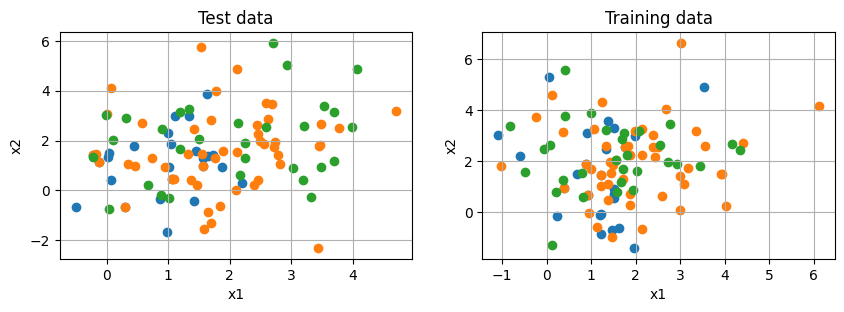

In [54]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.scatter(*X_2D3cl[0])
plt.scatter(*X_2D3cl[1])
plt.scatter(*X_2D3cl[2])
plt.title(f'Test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.subplot(3,2,2)
plt.scatter(*Y_2D3cl[0])
plt.scatter(*Y_2D3cl[1])
plt.scatter(*Y_2D3cl[2])
plt.title(f'Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

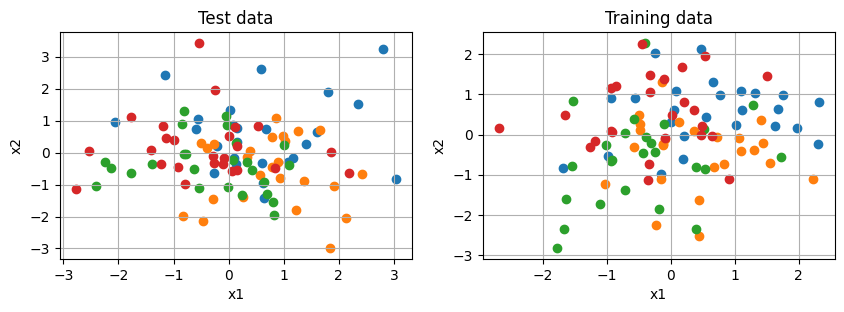

In [55]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.scatter(*X_2D4cl[0])
plt.scatter(*X_2D4cl[1])
plt.scatter(*X_2D4cl[2])
plt.scatter(*X_2D4cl[3])
plt.title(f'Test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.subplot(3,2,2)
plt.scatter(*Y_2D4cl[0])
plt.scatter(*Y_2D4cl[1])
plt.scatter(*Y_2D4cl[2])
plt.scatter(*Y_2D4cl[3])
plt.title(f'Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

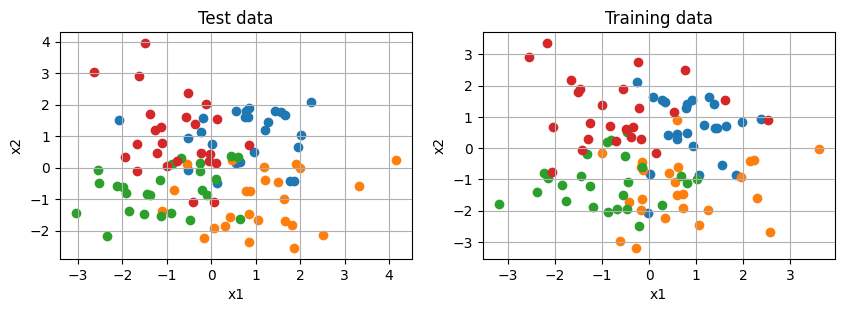

In [56]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.scatter(*X_2D4cl_ms[0])
plt.scatter(*X_2D4cl_ms[1])
plt.scatter(*X_2D4cl_ms[2])
plt.scatter(*X_2D4cl_ms[3])
plt.title(f'Test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.subplot(3,2,2)
plt.scatter(*Y_2D4cl_ms[0])
plt.scatter(*Y_2D4cl_ms[1])
plt.scatter(*Y_2D4cl_ms[2])
plt.scatter(*Y_2D4cl_ms[3])
plt.title(f'Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

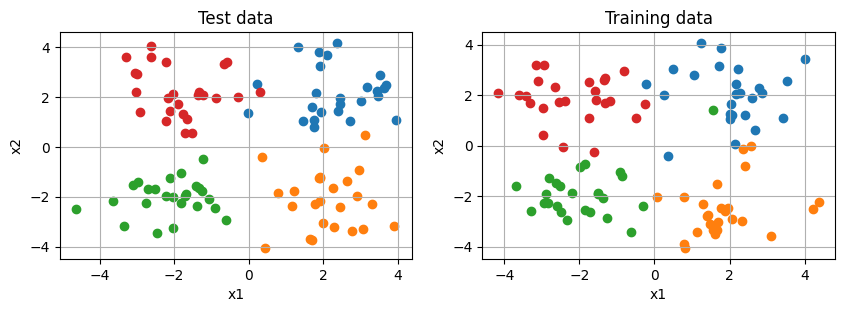

In [57]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.scatter(*X_2D4cl_hs[0])
plt.scatter(*X_2D4cl_hs[1])
plt.scatter(*X_2D4cl_hs[2])
plt.scatter(*X_2D4cl_hs[3])
plt.title(f'Test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.subplot(3,2,2)
plt.scatter(*Y_2D4cl_hs[0])
plt.scatter(*Y_2D4cl_hs[1])
plt.scatter(*Y_2D4cl_hs[2])
plt.scatter(*Y_2D4cl_hs[3])
plt.title(f'Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

It is expected that the ML-algorithm will have higher accuracy / lower error in problems with higher degree of separability.